# Creative Level Models - KPI Baselines: Random Forest

This notebook is to build a creative level predictive model for awareness, consideration and intent rates, using the creative elements as predictors.

In [1]:
import numpy as np, pandas as pd, os, matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)
%matplotlib inline

In [2]:
df_raw = pd.read_csv(r"G:\My Drive\Creative_Meta_Analysis\Wave_2\SUMMARY_4.csv")

## Data Prep

In [3]:
df_raw.head()

,SID,Creative_Name,aware,cons,purch,enjoy,brand,rel,b_appeal,aware_base,cons_base,purch_base,gender,north_america,emea,apac,mobile,desktop,s06,s15,s30,age_30,age_45,p_low,p_high,pro_nexus,pro_android_os,pro_chromebook,pro_chromecast_aud,pro_chromecast,pro_google_play,pro_youtube_red,pro_youtube_music,pro_google_user,pro_google_photos,pro_g_suite,pro_pixel,pro_daydream,pro_android_pay,pro_google_home,pro_gsa,pro_google_assist,pro_youtube_tv,pro_android_wear,pro_fi,pro_youtube,pro_google_cloud,pro_google_express,pro_digital_skills,pro_feed,pro_google_home_mini,pro_duo,pro_ellen,pro_pixelbook,pro_google_duo,pro_pixel_2,pro_watercooler,pro_google_home_max,Real_World,Story_Driven,Event,Google_Logo_Upfront_Recode,Product_Logo_Upfront_Recode,Audio_Mention_Upfront_Recode,No_of_Visuals_Recode,Google_Logo_50,Product_Logo_50,Product_Shot_50,Text_on_End_Card,Demo,Front_Card,End_Card,Pop_Culture,Visually_Text_Only,Music,Voiceover,No_Product_Msgs_Recode
0,266344,Nexus5AvailableNow15sec=266344B (Test),0.478548,0.283828,0.369637,0.495050,0.693069,0.749175,0.577558,0.310000,0.18,0.36,0.287129,1,0,0,0,1,0,1,0,0.679868,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,Zero,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Zero
1,266344,Nexus5XAvailableNow30sec=266344A (Test),0.544262,0.295082,0.432787,0.619672,0.780328,0.868852,0.704918,0.310000,0.18,0.36,0.268852,1,0,0,0,1,0,0,1,0.678689,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,One+,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Two+
2,266344,Nexus6PAvailableNow30Sec=266344C (Test),0.590164,0.347541,0.445902,0.577049,0.793443,0.862295,0.714754,0.310000,0.18,0.36,0.340984,1,0,0,0,1,0,0,1,0.681967,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,Zero,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Two+
3,268118,Android Disco 30sec,0.923333,NaN,NaN,0.676667,0.756667,0.870000,0.676667,0.906667,NaN,NaN,0.326667,1,0,0,0,1,0,0,1,0.663333,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,real world,no,no,1+,Zero,Zero,Zero,no,no,yes,yes,yes,yes,yes,no,No,yes,no,Two+
4,268118,Android Fog 30sec,0.920530,NaN,NaN,0.658940,0.751656,0.850993,0.639073,0.906667,NaN,NaN,0.284768,1,0,0,0,1,0,0,1,0.652318,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,real world,yes,no,1+,1+,Zero,Zero,no,no,yes,yes,yes,yes,yes,no,No,yes,yes,One


In [4]:
df_raw.shape

(434, 77)

In [5]:
df_raw.columns

Index(['SID', 'Creative_Name', 'aware', 'cons', 'purch', 'enjoy', 'brand',
       'rel', 'b_appeal', 'aware_base', 'cons_base', 'purch_base', 'gender',
       'north_america', 'emea', 'apac', 'mobile', 'desktop', 's06', 's15',
       's30', 'age_30', 'age_45', 'p_low', 'p_high', 'pro_nexus',
       'pro_android_os', 'pro_chromebook', 'pro_chromecast_aud',
       'pro_chromecast', 'pro_google_play', 'pro_youtube_red',
       'pro_youtube_music', 'pro_google_user', 'pro_google_photos',
       'pro_g_suite', 'pro_pixel', 'pro_daydream', 'pro_android_pay',
       'pro_google_home', 'pro_gsa', 'pro_google_assist', 'pro_youtube_tv',
       'pro_android_wear', 'pro_fi', 'pro_youtube', 'pro_google_cloud',
       'pro_google_express', 'pro_digital_skills', 'pro_feed',
       'pro_google_home_mini', 'pro_duo', 'pro_ellen', 'pro_pixelbook',
       'pro_google_duo', 'pro_pixel_2', 'pro_watercooler',
       'pro_google_home_max', 'Real_World', 'Story_Driven', 'Event',
       'Google_Logo_Upfront_Re

In [7]:
df = df_raw[[
    'aware_base', 
    'cons_base', 
    'purch_base', 
    
    'north_america', 
    'emea', 
    'apac', 
    'mobile', 
    'desktop', 
    's06',
    's15', 
    's30',
    'pro_nexus', 
    'pro_android_os',   
    'pro_chromebook', 
    'pro_chromecast_aud', 
    'pro_chromecast',
    'pro_google_play', 
    'pro_youtube_red', 
    'pro_youtube_music',
    'pro_google_user', 
    'pro_google_photos', 
    'pro_g_suite', 
    'pro_pixel',
    'pro_daydream', 
    'pro_android_pay', 
    'pro_google_home', 
    'pro_gsa',
    'pro_google_assist', 
    'pro_youtube_tv', 
    'pro_android_wear', 
    'pro_fi',
    'pro_youtube', 
    'pro_google_cloud', 
    'pro_google_express',
    'pro_digital_skills', 
    'pro_feed',
    'pro_google_home_mini', 
    'pro_duo',
    'pro_ellen', 
    'pro_pixelbook', 
    'pro_google_duo', 
    'pro_pixel_2',
    'pro_watercooler', 
    'pro_google_home_max', 
    
    'Real_World', 
    'Story_Driven',
    'Event', 
    'Google_Logo_Upfront_Recode', 
    'Product_Logo_Upfront_Recode',
    'Audio_Mention_Upfront_Recode', 
    'No_of_Visuals_Recode',
    'Google_Logo_50', 
    'Product_Logo_50', 
    'Product_Shot_50',
    'Text_on_End_Card', 
    'Demo', 
    'Front_Card', 
    'Pop_Culture',
    'Music', 
    'Voiceover', 
    'No_Product_Msgs_Recode'
]]

In [8]:
df = pd.get_dummies(df, columns = [
    'Real_World', 
    'Story_Driven',
    'Event', 
    'Google_Logo_Upfront_Recode', 
    'Product_Logo_Upfront_Recode',
    'Audio_Mention_Upfront_Recode', 
    'No_of_Visuals_Recode',
    'Google_Logo_50', 
    'Product_Logo_50', 
    'Product_Shot_50',
    'Text_on_End_Card', 
    'Demo', 
    'Front_Card', 
    'Pop_Culture',
    'Music', 
    'Voiceover', 
    'No_Product_Msgs_Recode'
])

## Model KPI Baselines

### Awareness

In [9]:
df_aware = df.drop(axis=1, columns=['cons_base', 'purch_base']).dropna()
X = df_aware.drop(axis=1, columns=['aware_base'])
y_aware = df_aware['aware_base']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_aware, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = [{
    'n_estimators': [22, 23, 24],
    'max_depth': [20, 25, 30],
    'max_features': ['auto'] 
}]

rf_aware = RandomForestRegressor(random_state=42)
rf_grid_aware = GridSearchCV(rf_aware, params)
rf_grid_aware.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [22, 23, 24], 'max_depth': [20, 25, 30], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [12]:
pd.DataFrame(rf_grid_aware.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.042446,0.002674,0.834895,0.973881,20,auto,22,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",7,0.892255,0.981506,0.919164,0.971607,0.692740,0.968530,0.004038,0.000473,0.100890,0.005536
1,0.043449,0.002006,0.836839,0.973630,20,auto,23,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",4,0.892657,0.981273,0.919599,0.970668,0.697749,0.968949,0.001250,0.000819,0.098742,0.005450
2,0.046789,0.002019,0.834773,0.974076,20,auto,24,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",9,0.890543,0.981759,0.918944,0.971323,0.694319,0.969147,0.001251,0.000016,0.099766,0.005505
3,0.044772,0.002675,0.835056,0.976888,25,auto,22,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",6,0.893359,0.982259,0.927479,0.978496,0.683796,0.969908,0.003764,0.000474,0.107620,0.005169
4,0.051113,0.001337,0.837045,0.976813,25,auto,23,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",3,0.893337,0.981891,0.926873,0.978045,0.690410,0.970503,0.003585,0.000473,0.104354,0.004730
5,0.058822,0.002341,0.834852,0.977166,25,auto,24,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",8,0.891208,0.982422,0.925668,0.978506,0.687163,0.970569,0.009201,0.000474,0.105140,0.004931
6,0.068516,0.003343,0.836727,0.977156,30,auto,22,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",5,0.893098,0.982197,0.928381,0.979258,0.688183,0.970014,0.011115,0.001252,0.105783,0.005191
7,0.056484,0.002673,0.839514,0.977343,30,auto,23,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",1,0.893083,0.981833,0.927825,0.979501,0.697143,0.970694,0.005326,0.000473,0.101440,0.004797
8,0.064504,0.003677,0.837304,0.977696,30,auto,24,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",2,0.890970,0.982368,0.926758,0.979924,0.693692,0.970796,0.010527,0.000472,0.102366,0.004980


In [13]:
rf_aware = rf_grid_aware.best_estimator_

In [14]:
from sklearn.metrics import mean_squared_error

rmse_aware = mean_squared_error(y_test, rf_aware.predict(X_test))**0.5
rmse_aware

0.09787999916389159

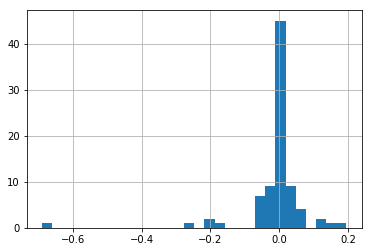

In [15]:
residuals = y_test-rf_aware.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Consideration

In [16]:
df_cons = df.drop(axis=1, columns=['aware_base', 'purch_base']).dropna()
X = df_cons.drop(axis=1, columns=['cons_base'])
y_cons = df_cons['cons_base']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cons, test_size=0.2, random_state=42)

In [18]:
params = [{
    'n_estimators': [40, 45, 50],
    'max_depth': [15, 25, 35],
    'max_features': ['auto'] 
}]

rf_cons = RandomForestRegressor(random_state=42)
rf_grid_cons = GridSearchCV(rf_cons, params)
rf_grid_cons.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [40, 45, 50], 'max_depth': [15, 25, 35], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [19]:
pd.DataFrame(rf_grid_cons.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.075547,0.003343,0.768680,0.960830,15,auto,40,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",9,0.768554,0.963201,0.802573,0.958996,0.734913,0.960294,0.025413,9.452695e-04,0.027622,0.001758
1,0.051136,0.002351,0.769095,0.961063,15,auto,45,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",8,0.779083,0.963525,0.800833,0.960178,0.727368,0.959487,0.000820,4.647820e-04,0.030812,0.001763
2,0.059168,0.002328,0.771222,0.960966,15,auto,50,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",3,0.780737,0.962973,0.800531,0.959922,0.732397,0.960001,0.001651,4.779927e-04,0.028618,0.001420
3,0.046445,0.002008,0.769539,0.961084,25,auto,40,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",6,0.768554,0.963201,0.805149,0.959756,0.734913,0.960294,0.001238,2.979967e-06,0.028682,0.001514
4,0.052807,0.002005,0.769890,0.961302,25,auto,45,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",4,0.779083,0.963525,0.803220,0.960894,0.727368,0.959487,0.002875,1.123916e-07,0.031641,0.001674
5,0.061832,0.004010,0.771968,0.961173,25,auto,50,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",1,0.780737,0.962973,0.802770,0.960545,0.732397,0.960001,0.003431,1.417090e-03,0.029391,0.001292
6,0.063707,0.002002,0.769539,0.961084,35,auto,40,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",6,0.768554,0.963201,0.805149,0.959756,0.734913,0.960294,0.021335,5.047622e-06,0.028682,0.001514
7,0.075200,0.003008,0.769890,0.961302,35,auto,45,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",4,0.779083,0.963525,0.803220,0.960894,0.727368,0.959487,0.002836,8.188708e-04,0.031641,0.001674
8,0.070522,0.003677,0.771968,0.961173,35,auto,50,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",1,0.780737,0.962973,0.802770,0.960545,0.732397,0.960001,0.001891,4.732812e-04,0.029391,0.001292


In [20]:
rf_cons = rf_grid_cons.best_estimator_

In [21]:
rmse_cons = mean_squared_error(y_test, rf_cons.predict(X_test))**0.5
rmse_cons

0.0312810806691711

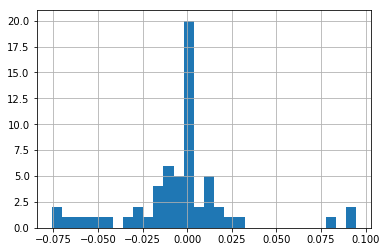

In [22]:
residuals = y_test-rf_cons.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Purchase

In [23]:
df_purch = df.drop(axis=1, columns=['aware_base', 'cons_base']).dropna()
X = df_purch.drop(axis=1, columns=['purch_base'])
y_purch = df_purch['purch_base']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_purch, test_size=0.2, random_state=42)

In [25]:
params = [{
    'n_estimators': [225, 250, 275],
    'max_depth': [20, 25],
    'max_features': ['auto'] 
}]

rf_purch = RandomForestRegressor(random_state=42)
rf_grid_purch = GridSearchCV(rf_purch, params)
rf_grid_purch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [225, 250, 275], 'max_depth': [20, 25], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
pd.DataFrame(rf_grid_purch.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.302017,0.010683,0.767658,0.958327,20,auto,225,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",1,0.824152,0.962046,0.836209,0.958342,0.641222,0.954594,0.015785,0.000930,0.089047,0.003042
1,0.393379,0.012701,0.764647,0.958000,20,auto,250,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",3,0.825306,0.961750,0.833616,0.957736,0.633579,0.954515,0.042273,0.003100,0.092231,0.002960
2,0.392698,0.013035,0.762462,0.958107,20,auto,275,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",5,0.822820,0.961887,0.832469,0.958200,0.630648,0.954234,0.050905,0.000819,0.092777,0.003125
3,0.324195,0.010363,0.766845,0.958325,25,auto,225,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",2,0.823416,0.962274,0.835719,0.958204,0.640007,0.954498,0.028738,0.000472,0.089336,0.003176
4,0.352281,0.012020,0.764022,0.957990,25,auto,250,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",4,0.824571,0.961919,0.833161,0.957614,0.632895,0.954438,0.043283,0.001427,0.092277,0.003066
5,0.400074,0.012022,0.762003,0.958103,25,auto,275,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",6,0.822493,0.962055,0.832053,0.958093,0.630014,0.954162,0.035774,0.000819,0.092899,0.003222


In [27]:
rf_purch = rf_grid_purch.best_estimator_

In [28]:
rmse_purch = mean_squared_error(y_test, rf_purch.predict(X_test))**0.5
rmse_purch

0.06671254902367701

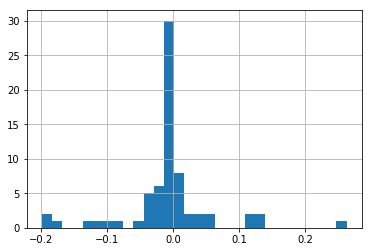

In [29]:
residuals = y_test-rf_purch.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Save Models

In [30]:
from sklearn.externals import joblib

joblib.dump(rf_aware, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_aware_creative_base.pkl') 
joblib.dump(rf_cons, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_cons_creative_base.pkl') 
joblib.dump(rf_purch, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_purch_creative_base.pkl') 

['C:\\Users\\william.raikes\\Programming\\Python\\Creative_Elements_App\\model_building\\pickled_models\\rf_purch_creative_base.pkl']

### Test Prediction 

See how well it does with real scenarios, not just metric scores.

In [27]:
rf_aware.predict(df.iloc[100, 3:]), rf_cons.predict(df.iloc[100, 3:]), rf_purch.predict(df.iloc[100, 3:])

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resh

(array([0.70469562]), array([0.2635927]), array([0.28786065]))